# CDC Diabetes Health Indicators

📊 EDA and 🧠 Model Training using the [CDC Diabetes Health Indicators dataset](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).

Please refer to [README.md](README.md) in the base directory which contains all relevant project. There the following information is covered:

1. Introduction to problem and task
1. Information about the dataset
1. Instruction to setup the virtual environment for running this Jupyter notebook


In this notebook we will perform the following steps:

1. Load the dataset
1. Perform Exploratory Data Analysis (EDA)
1. Train various models to predict the diabetes status of a patient: (pre-)diabetic or not


## Downloading the dataset

**Data download used in this project**

- ✅ In this project the `ucimlrepo` will be used to download the dataset and all relevant metadata. 

- 💾 The dataset's dataframe as well as all other relevant data will be stored in the [./dataset](dataset) folder locally. 

- 💡 Downloading and then reusing the downloaded data instead of redownloading it using the `ucimlrepo` package done to ensure reproducibility of the project in case the dataset is not available anymore or changes over time.

- 🐍 Python API using the `ucimlrepo` package, the code below is provided by the dataset page:

    ```python
    from ucimlrepo import fetch_ucirepo 
    # fetch dataset 
    cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
    # data (as pandas dataframes) 
    X = cdc_diabetes_health_indicators.data.features 
    y = cdc_diabetes_health_indicators.data.targets 
    # metadata 
    print(cdc_diabetes_health_indicators.metadata) 
    # variable information 
    print(cdc_diabetes_health_indicators.variables) 
    ```

- 📄 The metadata of the downloaded dataset, using the code above, includes a download link for the dataset in CSV format. However, no additional information is provided along with the CSV file: https://archive.ics.uci.edu/static/public/891/data.csv. But the information needed can be accessed from the metadata.


**Data downloaded and stored in this project**

📂 The dataset and parts of the metadata is downloaded and stored in the [./dataset](dataset) folder locally.

- dataframe - [./dataset/data.csv](dataset/data.csv)
- information about variables - [./dataset/variables.csv](dataset/variables.csv)
- metadata (only some parts of it) - [./dataset/metadata_partially.json](dataset/metadata_partially.json)

**Further information on the dataset**

ℹ️ More information about the features will be revealed after downloading the dataset and revealing the dataset's metadata.

In [1]:
## Import of all required libraries
import os
import json
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from IPython.utils.capture import capture_output
from IPython.display import display


Defining variables for downloading and storing the dataset.

In [2]:
path_dir = './dataset'
# data set id of the cdc diabetes health indicators
dataset_id = 891
path_dataset = os.path.join(path_dir, 'data.csv')
path_variables = os.path.join(path_dir, 'variables.csv')
path_metadata = os.path.join(path_dir, 'metadata_partially.json')

💡 The variables below have only been set to `True` once for downloading all relevant data in cell after it. 
Afterwards they were set to `False` to avoid downloading the data again. 

Please keep them set to **`False`** for reproduding the results presented in this notebook, as it can not be assured that the dataset from the download page might change over time or might not be available for download any longer.

The dataset downloaded locally has the following metadata information: `"last_updated": "Wed Sep 27 2023"`

In [3]:
# Data has already been downloaded and saved as json and csv.
# Therefore both variable can be set to False.
# Value True was only used for initial download.

# modify only in case of downloading again
download = False
# only used for writing additional information to local files 
write_files = False

In [4]:
if download:
    cdc_diabetes_health_indicators = fetch_ucirepo(id=dataset_id)
    
    # create dataframe from data and targets
    X = cdc_diabetes_health_indicators.data.features
    y = cdc_diabetes_health_indicators.data.targets
    ids = cdc_diabetes_health_indicators.data.ids
    df = pd.concat([ids, y, X], axis=1)
    df.set_index('ID', inplace=True)
    df = pd.concat([ids, y, X], axis=1)

    # read variables dataframe containing information about the variables
    variables = cdc_diabetes_health_indicators.variables

    print("keys:\n", cdc_diabetes_health_indicators.keys())
    print("metadata keys:\n", cdc_diabetes_health_indicators.metadata)
    display(cdc_diabetes_health_indicators.variables)
    if write_files:
        os.makedirs(path_dir, exist_ok=True)

        df.to_csv(path_dataset, index=False)
        cdc_diabetes_health_indicators.variables.to_csv(
            path_variables, index=False)
        # write the following to a json file
        json_data = {}
        json_data['keys'] = list(cdc_diabetes_health_indicators.keys())
        json_data['metadata_keys'] = list(cdc_diabetes_health_indicators.metadata.keys())
        json_data['data'] = {'headers': cdc_diabetes_health_indicators.data.headers.tolist(),}
        json_data['variables'] = 'see ./variables.csv for more information' 
        json_data['metadata'] = dict(cdc_diabetes_health_indicators.metadata)

        with open(path_metadata, 'w') as f:
            f.write(json.dumps(json_data, indent=2))
else:
    df = pd.read_csv(path_dataset, index_col='ID')
    variables = pd.read_csv(path_variables)


Checking the head of the dataframe. The `ID` is the patient ID and the first column `Diabetes_binary` is the target variable indicating (pre-)diabetes or not.
- `0` indicates no diabetes
- `1` indicates (pre-)diabetes

In [5]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
ID,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


---
## Information about the dataset

In the metadata there is an additional dataframe provided which contains information about the features. The dataframe is stored in the `variables` attribute of the metadata.

In [6]:
display(variables)

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,NaN,Patient ID,NaN,no
1,Diabetes_binary,Target,Binary,NaN,0 = no diabetes 1 = prediabetes or diabetes,NaN,no
2,HighBP,Feature,Binary,NaN,0 = no high BP 1 = high BP,NaN,no
3,HighChol,Feature,Binary,NaN,0 = no high cholesterol 1 = high cholesterol,NaN,no
4,CholCheck,Feature,Binary,NaN,0 = no cholesterol check in 5 years 1 = yes ch...,NaN,no
5,BMI,Feature,Integer,NaN,Body Mass Index,NaN,no
6,Smoker,Feature,Binary,NaN,Have you smoked at least 100 cigarettes in you...,NaN,no
7,Stroke,Feature,Binary,NaN,(Ever told) you had a stroke. 0 = no 1 = yes,NaN,no
8,HeartDiseaseorAttack,Feature,Binary,NaN,coronary heart disease (CHD) or myocardial inf...,NaN,no
9,PhysActivity,Feature,Binary,NaN,physical activity in past 30 days - not includ...,NaN,no


### Variables (Target and Features)

The dataset has a column ID which is the patient ID.

| ID | Type | Description | 
| --- | --- | --- |
| ID | Integer | Patient ID |


The target column is `Diabetes_binary` which indicates (pre-)diabetes or not.

| Target | Type | Description | 
| --- | --- | --- |
| Diabetes_binary | Binary | 0 = no diabetes<br>1 = prediabetes or diabetes |

There are 21 feature available in the dataset sorted in the table below using their data type:
- Integer
- Categrical
- Binary

> Information for binary features (except for feature `Sex`):
> - `0` = `no` 
> - `1` = `yes`

| Features | Type | Description | 
| --- | --- | --- |
| BMI | Integer | Body Mass Index |
| MentHlth | Integer | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days |
| PhysHlth | Integer | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days |
|  |  |  |
| GenHlth | Integer (Categorical) | Would you say that in general your health is: scale 1-5<br>1 = excellent<br>2 = very good<br> 3 = good<br> 4 = fair<br> 5 = poor |
| Age | Integer (Categorical) | Age,13-level age category (_AGEG5YR see codebook)<br>1 = 18-24<br>9 = 60-64<br> 13 = 80 or older |
| Education | Integer (Categorical) | Education level (EDUCA see codebook) scale 1-6<br>1 = Never attended school or only kindergarten<br>2 = Grades 1 through 8 (Elementary)<br>3 = Grades 9 through 11 (Some high school)<br>4 = Grade 12 or GED (High school graduate)<br>5 = College 1 year to 3 years (Some college or technical school)<br>6 = College 4 years or more (College graduate) |
| Income | Integer (Categorical) | Income scale (INCOME2 see codebook) scale 1-8<br> 1 = less than $10,000<br> 5 = less than $35,000<br> 8 = $75,000 or more" |
|  |  |  |
| Sex | Binary | Sex, 0 = female 1 = male |
| HighBP | Binary | High blood preasure |
| HighChol | Binary | High cholesterol |
| CholCheck | Binary | Cholesterol check in 5 years |
| Smoker | Binary | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] |
| Stroke | Binary | (Ever told) you had a stroke. |
| HeartDiseaseorAttack | Binary | Coronary heart disease (CHD) or myocardial infarction (MI) |
| PhysActivity | Binary | Physical activity in past 30 days - not including job< |
| Fruits | Binary | Consume Fruit 1 or more times per day |
| Veggies | Binary | Consume Vegetables 1 or more times per day |
| HvyAlcoholConsump | Binary | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)|
| AnyHealthcare | Binary | "Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. |
| NoDocbcCost | Binary | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? |
| ffWalk | Binary | Do you have serious difficulty walking or climbing stairs? |




Check how the data is stored in the dataframe, what kind of datatypes are used.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-null  

From the the output we can see that all datatypes are stored as `int64` (target variable as well as feature variables).

✂️ Creating separate variables for the different types of columns:

- `target_name` - variable for target name
- `feature_names_binary` - list of binary feature names
- `feature_names_categorical` - list of categorical feature names
- `feature_names_integer` - list of integer feature names

💡 Data type can stay `int64` for all columns. Going to apply OneHotEncoding to all categorical columns later.

In [8]:
target_name = 'Diabetes_binary'
feature_names_binary = [
    'Sex', 
    'HighBP', 
    'HighChol', 
    'CholCheck', 
    'Smoker', 
    'Stroke', 
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'DiffWalk',
]
feature_names_integer = ['BMI', 'MentHlth', 'PhysHlth']
feature_names_categorical = ['GenHlth', 'Age', 'Education', 'Income']

feature_names = feature_names_binary + feature_names_integer + feature_names_categorical

Using assertions to check if the data columns have been split correctly into `Binary`, `Categorical` and `Integer`.

- Checking that the sum of values in the `feature_<type>` lists is equal to the number of columns in the data frame
- Checking that the `feature_<type>` lists do not overlap
- Checking that the `feature_<type>` lists contain all columns of the data frame

✅ If there is no assertion error, all column names have been split correctly.

In [9]:
# create assert in case column numbers do not match
len_all_features = len(feature_names_binary) + len(feature_names_integer) + len(feature_names_categorical)
assert df.columns.size == len_all_features + 1, \
    f'Number of columns in dataframe ({df.columns.size}) does not match the number of features ({len_all_features + 1})'

In [10]:
# create asssert in case names overlap
set_binary_intersect_integer = set(feature_names_binary).intersection(set(feature_names_integer))
set_binary_intersect_categorical = set(feature_names_binary).intersection(set(feature_names_categorical))
set_integer_intersect_categorical = set(feature_names_integer).intersection(set(feature_names_categorical))


assert target_name not in set_binary_intersect_integer, \
    f'Features overlap between binary and integer features: {set_binary_intersect_integer}'
assert target_name not in set_binary_intersect_categorical, \
    f'Features overlap between binary and categorical features: {set_binary_intersect_categorical}'
assert target_name not in set_integer_intersect_categorical, \
    f'Features overlap between integer and categorical features: {set_integer_intersect_categorical}'

assert set_binary_intersect_integer == set(), \
    f'Features overlap between binary and integer features: {set_binary_intersect_integer}'
assert set_binary_intersect_categorical == set(), \
    f'Features overlap between binary and categorical features: {set_binary_intersect_categorical}'
assert set_integer_intersect_categorical == set(), \
    f'Features overlap between integer and categorical features: {set_integer_intersect_categorical}'

In [11]:
# create assert in case target column is not in dataframe
set_diff = set(df.columns).difference(set([target_name]+feature_names))
assert set_diff == set(), \
    f'Dataframe contains columns not covered by the other variables: {set_diff}'

---

## Data Set Information

Checking basics dataset for
- unique values
- missing values
- duplicates

In [12]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

It is said that the dataset has no missing values, but checking to be sure.

In [13]:
indices_issnull = df.isnull().any()
print(f"Missing data: {'Yes' if indices_issnull.any() else 'No'}")

Missing data: No


✅ As was stated in the dataset page information there are no missing values in the dataframe.

On the dataset page it is stated that each row in the dataset represents a person participating in the study.
The patient ID, is used as dataframe index. We are now checking, if there are duplicate rows (not including the ID) and explain how we are going to handle them.

In [14]:
indices_duplicates = df.duplicated(keep='first')
num_total = len(df)
num_duplicates = indices_duplicates.sum()
print(f"Total number of rows: {num_total:7d}")
print(f"Number of duplicates: {num_duplicates:7d}")
print(f"Percentage of duplicates: {num_duplicates/num_total:.2%}")

Total number of rows:  253680
Number of duplicates:   24206
Percentage of duplicates: 9.54%


**Oberservation:**  There are almost 10% of duplicate rows (excluding the patient ID) in the dataset.

**Explanation:**
💡 Except for the `BMI` feature, which is only stored as `Integer`, the dataset consists of only `Binary` and `Categorical` features. This means that the duplicate rows are not duplicate patients, but different patients displaying the same values for all features due to the nature of the data types.

**Additional Information:** The [BMI (body mass index)](https://en.wikipedia.org/wiki/Body_mass_index) is calculated using the following formula below. The result is a floating point number, but in the dataset the BMI is stored as an integer. This means that the BMI is rounded to the next integer. 

$$
BMI = \frac{mass_{kg}}{height_{m}^2}
$$

**Handling:** We are now going to check, if the patient IDs are unique, comparing the index length with the number of unique patient IDs.





In [15]:
# We are now going to check, if the patient IDs are unique, comparing the index length with the number of unique patient IDs.
print(f"{df.index.nunique()} unique patient IDs")
print(f"{len(df)} rows in total")

assert df.index.nunique() == len(df), "Patient IDs are not unique"

253680 unique patient IDs
253680 rows in total


✅ The patient IDs are unique, so we can keep the duplicate rows in the dataset. As these are just patients displaying the same values for all features due to the nature of the data types.

❗Before investigating the dataset any further, we will now split the dataset into a training, validation and test set. All further investigation will be done on the training set only. As we must never investigate the validation and test set to avoid overfitting.

---

## Splitting into Train and Test
- ℹ️ If there is no separate test datasset available, it is important to split the data into `test` and `train` (including `val`). Before analyzing the data any further.
    - 60% `train`
    - 20% `val`
    - 20% `test`

- 💡Using a seed point (`random_state`) to make sure the split is reproducible.

In [16]:
# using a seed point to make the split reproducible
seed = 42
frac_train = 0.6
frac_val = 0.2
frac_test = 0.2
df_train, df_test = train_test_split(df, test_size=frac_test, random_state=seed, shuffle=True)
df_train, df_val = train_test_split(df_train, test_size=frac_val/frac_train, random_state=seed, shuffle=True)

overall_len = len(df_train) + len(df_val) + len(df_test)    
overall_len == len(df)

True

💾 Storing the splits so they can get reused later on.

In [17]:
df_train.to_csv(os.path.join(path_dir, 'split_train.csv'))
df_val.to_csv(os.path.join(path_dir, 'split_val.csv'))
df_test.to_csv(os.path.join(path_dir, 'split_test.csv'))

---

## Exploratory Data Analysis (EDA) - ❗ on training split only❗

As we must never investigate our `test` split, we are going to do the EDA on the `train` split.

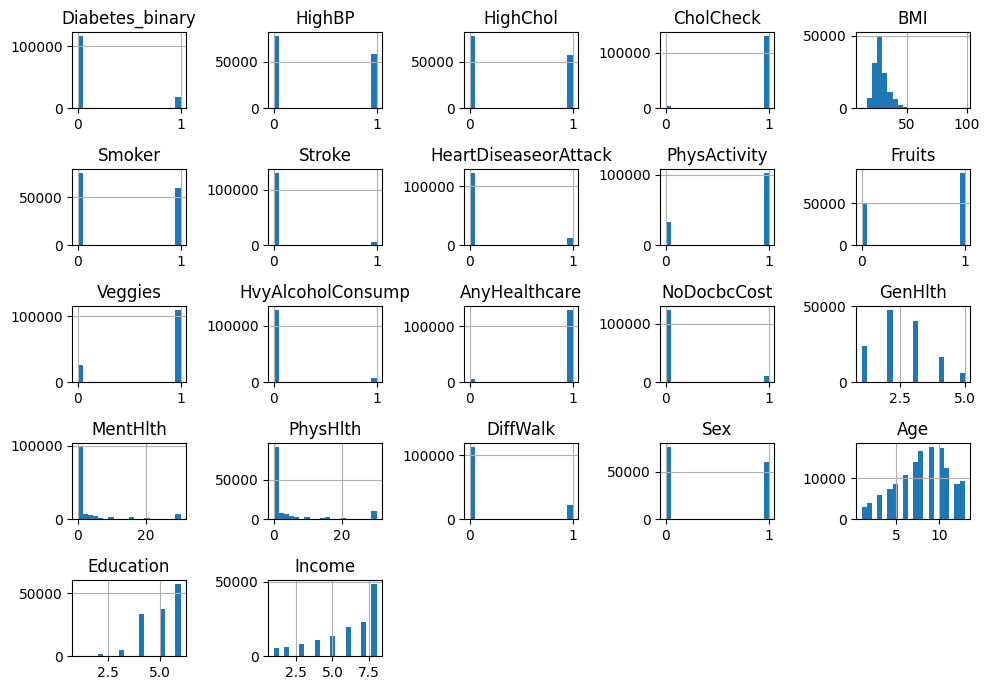

In [18]:
ax = df_train.hist(figsize=(10, 7), bins=20)
plt.tight_layout()
plt.show()

⚖️ Regarding the target variable `Diabetes_binary` it can be seen that the data is imbalanced. There are more healthy people than people with diabetes. This is important to keep in mind when training and evaluating the model.

Using the histogram plot we get a first impression of the distribution of the data. We are now going to look deeper into the values of the features investigating them separately regarding type (binary, categorical, integer).

In [19]:
# create variables for the binary features for better annotation in the figures
feature_names_sex = ['Sex']
feature_names_binary_yn = feature_names_binary.copy()
feature_names_binary_yn = list(set(feature_names_binary).difference(set(feature_names_sex)))

# create temporary dataframe for plotting purposes and map the binary features to yes/no
# map sex to female and male for 0 and 1 respectively
df_train_plot = df_train.copy(deep=True)
df_train_plot[feature_names_binary_yn] = df_train_plot[feature_names_binary_yn].replace({0: 'No', 1: 'Yes'})
df_train_plot[feature_names_sex] = df_train_plot[feature_names_sex].replace({0: 'Female', 1: 'Male'})
df_train_plot[target_name] = df_train_plot[target_name].replace({0: 'No', 1: 'Yes'})


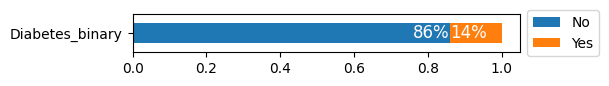

In [20]:
df_tmp_target = df_train_plot[[target_name]].apply(pd.Series.value_counts, normalize=True).T.round(2)
df_tmp_target.plot(kind='barh', stacked=True, figsize=(5, 0.5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# annotate the figure with the percentages
plt.annotate(
    f"{df_tmp_target.iloc[0]['Yes']:.0%}", 
    xy=(0.5, 0), xytext=(1-df_tmp_target.iloc[0]['Yes'], 0), ha='left', va='center', color='white', size=12)
plt.annotate(
    f"{df_tmp_target.iloc[0]['No']:.0%}", 
    xy=(0.5, 0), xytext=(df_tmp_target.iloc[0]['No'], 0), ha='right', va='center', color='white', size=12)

plt.show()


⚖️ High imbalance for the target variable, as already seen in the histogram plot.

In [21]:
df_sexes_counts = df_train_plot[feature_names_sex].apply(pd.Series.value_counts, normalize=True).T.round(2)
df_sexes_counts.style.format("{:.0%}").background_gradient(cmap='Blues', axis=1, vmin=0, vmax=1)

Sex,Female,Male
Sex,56%,44%


♀️/♂️ **Sex**: There are more female than male patients in the dataset.

- 56% female
- 44% male

This sounds not that much at first sight, but let us now calculate how much more female than male patients there are in the dataset in percent.

In [22]:
# calculate how much more patients are female than male
print(f"There are {(df_sexes_counts.Female / df_sexes_counts.Male).values[0] -1:.0%} more female patients than male patients in the dataset")

There are 27% more female patients than male patients in the dataset


We will want to have a model that will perform well for female and for male patients. Therefore, we will have to keep this imbalance in mind when training and evaluating the model.

But now we will dig deeper into this to find out if both group of patients have the same chance of being diagnosed with diabetes.

In [23]:
indices_diabetic = df_train[df_train[target_name]==1]
indices_nondiabetic = df_train[df_train[target_name]==0]
df_sex_diabetic_counts = df_train_plot.loc[indices_diabetic.index, feature_names_sex].apply(pd.Series.value_counts, normalize=True).T
df_sex_diabetic_counts.style.format("{:.0%}").background_gradient(cmap='Blues', axis=1, vmin=0, vmax=1)

Sex,Female,Male
Sex,52%,48%


Here the difference is smaller 
- 52% of the female patients are diabetic
- 48% of the male patients are diabetic

In [24]:
# calculate how much more patients are female than male
print(f"The dataset contains {(df_sex_diabetic_counts.Female / df_sex_diabetic_counts.Male).values[0] -1:.0%} more female diabetic patients than male diabetic patients")

The dataset contains 9% more female diabetic patients than male diabetic patients


Summary for different sexes
- The dataset contains 27% more female than male patients
- The dataset contains 9% more female diabetic patients than male diabetic patients

The last number is important to keep in mind when training and evaluating the model. In the worst case the difference could lead to recognizing diabetes a little worse for male patients than female patients. We should add this to the evaluation metrics when evaluating the model. The goal would be to achieve the almost same performance for both genders. 

For all other binary features we are now trying a side-by-side visualization using a dataframe and coloring it depending on the values.

In [25]:
pd.concat([
    df_train_plot.loc[indices_diabetic.index, feature_names_binary_yn].apply(pd.Series.value_counts, normalize=True).T, 
    df_train_plot.loc[indices_nondiabetic.index, feature_names_binary_yn].apply(pd.Series.value_counts, normalize=True).T], 
    axis=1, keys=['Diabetic', 'Non-diabetic']).style.format("{:.0%}").background_gradient(cmap='Blues', vmin=0, vmax=1)

Below we are using a countplot visualization to see check for correlation between the features and the target variable.

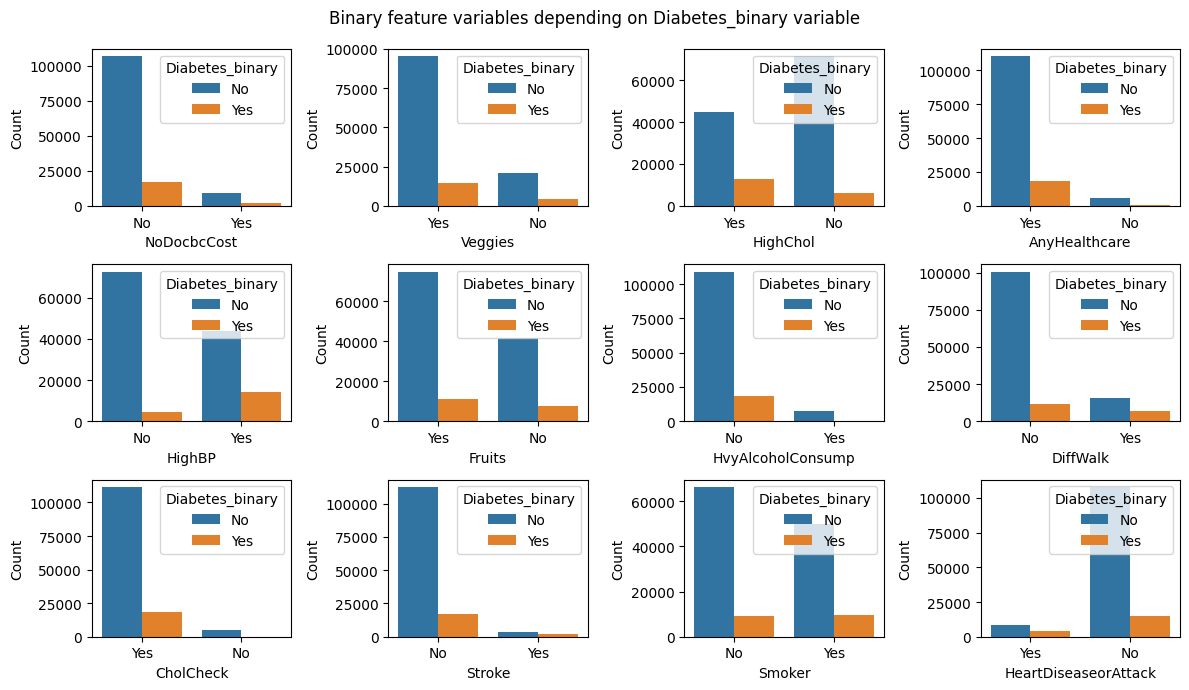

In [26]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

fig, axes = plt.subplots(3, 4, figsize=(12, 7))
axes = axes.flatten()
for ax, feature_name in zip(axes, feature_names_binary_yn):
    sns.countplot(df_train_plot, x=feature_name, hue=target_name, ax=ax,)
    ax.set_xlabel(feature_name)
    ax.set_ylabel('Count')

plt.suptitle("Binary feature variables depending on Diabetes_binary variable")
plt.tight_layout()
plt.show()


We can see that there are correlations between the target variable and the binary features, but well will check this later on using a correlation matrix.

We are not going to check the other feature variables.

In [27]:
import matplotlib.pyplot as plt

def plot_value_counts(features, title, nrows=1, figsize=None):
    num_features = len(features)
    ncols = np.ceil(num_features/nrows).astype(int)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.ravel()
    for i, feature in enumerate(features):
        # Count the number of occurrences of each category
        value_counts = df_train[feature].value_counts()
        
        # Create a bar plot on the i-th subplot
        ax = axes[i]
        ax.bar(value_counts.index, value_counts.values)
        
        # Set the title and axis labels
        ax.set_title(f'{feature}')
        ax.set_xlabel('Categories')
        ax.set_ylabel('Count')

    plt.suptitle(title)
    plt.tight_layout()  # Ensures proper spacing between subplots
    plt.show()


### Integer Feature Variables


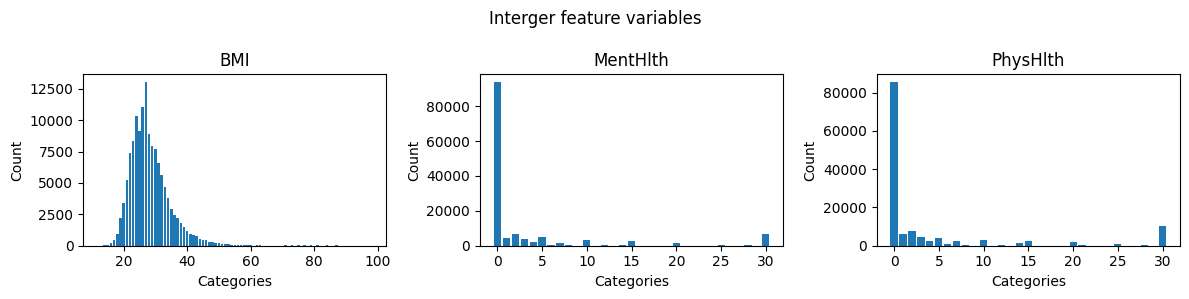

In [28]:
plot_value_counts(feature_names_integer, "Interger feature variables", figsize=(12,3))

We can see that we have a long-tail distribution for the BMI feature. The other two features Mental Health and Physical Health area also skewed. Both have the largest amount for the value `0` which corresponds to that most of the patients did not have any mental or physical health issues in the past 30 days.

1. For BMI we will check if applying a log transformation will help to get a more normal distribution.
1. For Mental Health and Physical Health we will scale the values using a MinMaxScaler to get the values between 0 and 1.

#### **BMI** - Body Mass Index

We are now going to if applying `log1p` in order to get  distribution that is more close to a normal distribution.

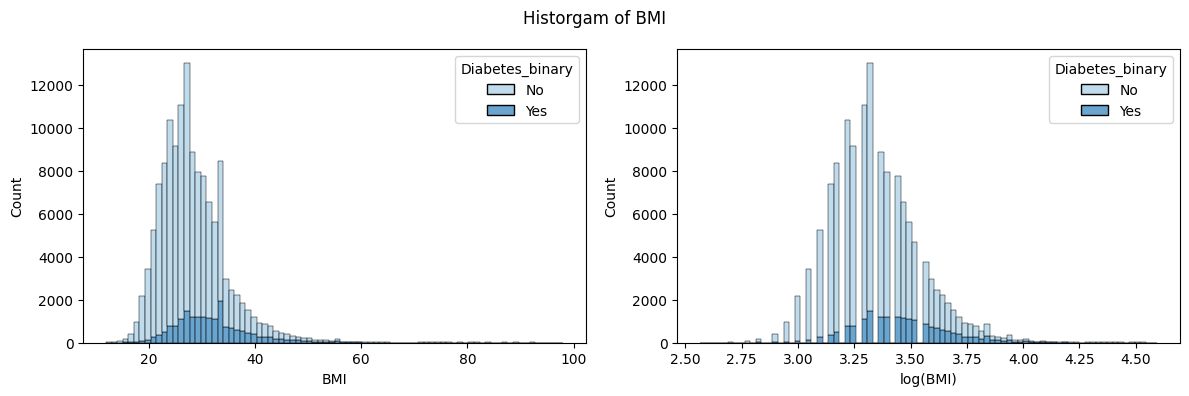

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
sns.histplot(df_train_plot, x='BMI', hue=target_name, ax=ax1, bins=df_train_plot['BMI'].nunique(), multiple='stack', palette='Blues')
df_train_plot_log = df_train_plot.copy(deep=True)
ax1.set_xlabel('BMI')

df_train_plot_log['BMI'] = np.log1p(df_train_plot['BMI'])
sns.histplot(df_train_plot_log, x='BMI', hue=target_name, ax=ax2, bins=df_train_plot['BMI'].nunique(), multiple='stack', palette='Blues')
ax2.set_xlabel('log(BMI)')

for ax in [ax1, ax2]:
    ax.set_ylabel('Count')
plt.suptitle('Historgam of BMI')
plt.tight_layout()
plt.show()

Plotting the histograms again, but as density plots. So it is easier to compare if the distribution between '(pre)-diabetic' and 'non-diabetic' patients are similar or differ.

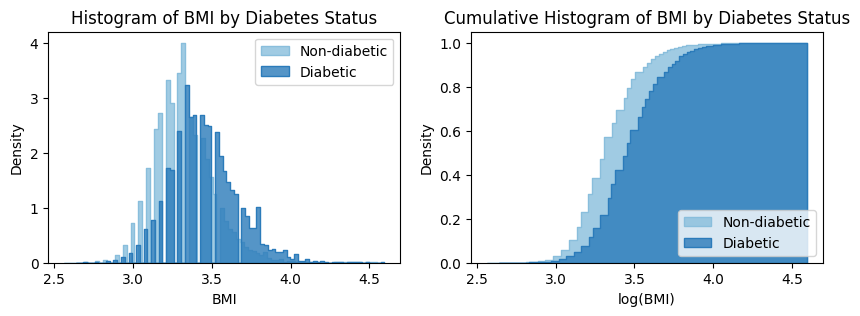

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
df_train_plot_nondiabetic = df_train_plot_log.drop(indices_diabetic.index)
df_train_plot_diabetic = df_train_plot_log.drop(indices_nondiabetic.index)

# Left plot: histogram
sns.histplot(
    data=df_train_plot_nondiabetic, x='BMI', 
    ax=ax1, bins=df_train_plot['BMI'].nunique(), color=sns.color_palette('Blues')[2], 
    alpha=0.8, label='Non-diabetic', stat='density', element='step')
sns.histplot(
    data=df_train_plot_diabetic, x='BMI', 
    ax=ax1, bins=df_train_plot['BMI'].nunique(), color=sns.color_palette('Blues')[4], 
    alpha=0.8, label='Diabetic', stat='density', element='step')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Density')
ax1.set_title('Histogram of BMI by Diabetes Status')
ax1.legend()

# Right plot: cumulative histogram
sns.histplot(
    data=df_train_plot_nondiabetic, x='BMI', ax=ax2, bins=df_train_plot['BMI'].nunique(), 
    color=sns.color_palette('Blues')[2], alpha=0.8, label='Non-diabetic', stat='density', cumulative=True, element='step')
sns.histplot(
    data=df_train_plot_diabetic, x='BMI', ax=ax2, bins=df_train_plot['BMI'].nunique(), 
    color=sns.color_palette('Blues')[4], alpha=0.8, label='Diabetic', stat='density', cumulative=True, element='step')
ax2.set_xlabel('log(BMI)')
ax2.set_ylabel('Density')
ax2.set_title('Cumulative Histogram of BMI by Diabetes Status')
ax2.legend(loc='lower right')

plt.show()

We can see that the shape of the distribution (log-values) are similar, but the be mean values are slightly shifted. Patients with a higher BMI are more likely suffer from diabetes.

We will check this later on using a correlation matrix.

#### Categorical Feature variables

The categorical feature variables are all ordinal. We will now check their value ranges. 

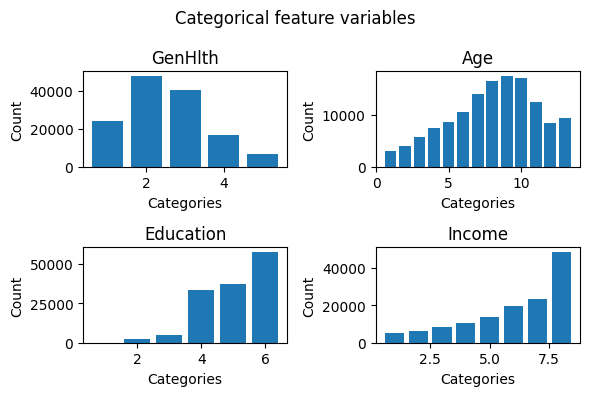

In [31]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df_train' and 'feature_names_categorical' is a list of categorical feature names
num_features = len(feature_names_categorical)
nrows = 2
ncols = np.ceil(num_features/nrows).astype(int)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 4))
axes = axes.ravel()
for i, feature in enumerate(feature_names_categorical):
    # Count the number of occurrences of each category
    value_counts = df_train[feature].value_counts()
    
    # Create a bar plot on the i-th subplot
    ax = axes[i]
    ax.bar(value_counts.index, value_counts.values)
    
    # Set the title and axis labels
    ax.set_title(f'{feature}')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')

plt.suptitle("Categorical feature variables")
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


For the `Age` feature we will apply the `StandardScaler` and all others we will Scale to a Range between `0` and `1`.

### Feature Importance
#### Correlation of target variable with all features

Text(0.5, 1.0, "Correlation between target 'Diabetes_binary' variable and feature variables")

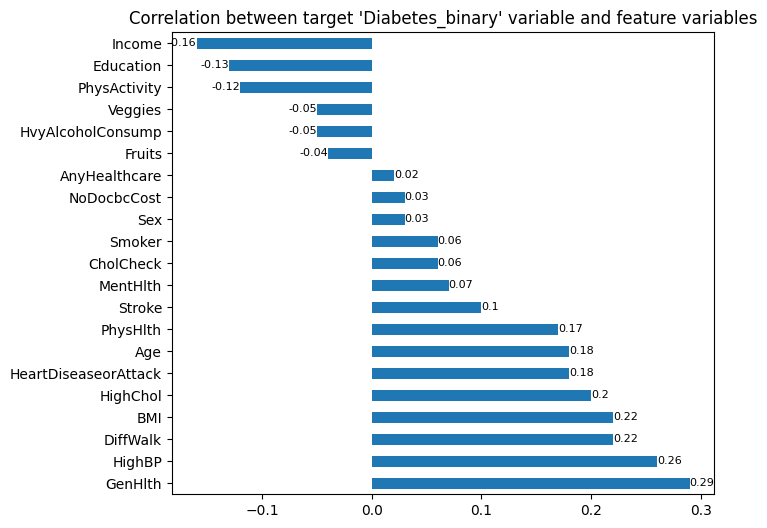

In [32]:
# correlate target with features
ax = df_train[feature_names].corrwith(df_train[target_name]).round(2).sort_values(ascending=False).plot(kind='barh', figsize=(7, 6))
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)
plt.title("Correlation between target 'Diabetes_binary' variable and feature variables")

There is a strong negative correlation between the target variable and the following features:
- Income (strongest negative correlation)
- Education
- Physical activities

There is a strong positive correlation between the target variable and the following features:
- General health (strongest positive correlation)
- Hight blood pressure
- Difficulty walking or climbing stairs
- Body mass index
- High cholesterol
- Heart disease or heart attack, patient having a heart disease or having heart attack in the past
- Age
- Physical health
- Stroke, patient having a stroke in the past

### Correlation Matrix for all features

We will now check for correlation between the features.

In [33]:
# correlation matrix, abbreviate the column names for better readability
corr_matrix = df_train[feature_names].corr()
# set upper triangle to nan incluing the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix = corr_matrix.mask(mask)
corr_matrix_short_names = corr_matrix.rename(columns=lambda x: f'{x[:5]}...' if len(x) > 8 else x)
display(corr_matrix_short_names.style.background_gradient(cmap='seismic', axis=None, vmin=-1, vmax=1))


,Sex,HighBP,HighChol,CholC...,Smoker,Stroke,Heart...,PhysA...,Fruits,Veggies,HvyAl...,AnyHe...,NoDoc...,DiffWalk,BMI,MentHlth,PhysHlth,GenHlth,Age,Educa...,Income
Sex,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HighBP,0.054908,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HighChol,0.028811,0.297316,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CholCheck,-0.019819,0.097304,0.082623,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Smoker,0.093887,0.097278,0.089966,-0.009603,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Stroke,0.004180,0.129873,0.092264,0.025260,0.062445,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HeartDiseaseorAttack,0.082678,0.212050,0.178628,0.042334,0.114048,0.205726,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
PhysActivity,0.030436,-0.126616,-0.077244,0.007813,-0.087284,-0.070146,-0.087317,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Fruits,-0.089170,-0.037236,-0.037799,0.024703,-0.077142,-0.011472,-0.018895,0.142460,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Veggies,-0.065527,-0.062202,-0.038372,0.006944,-0.029384,-0.042959,-0.038830,0.151108,0.252949,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


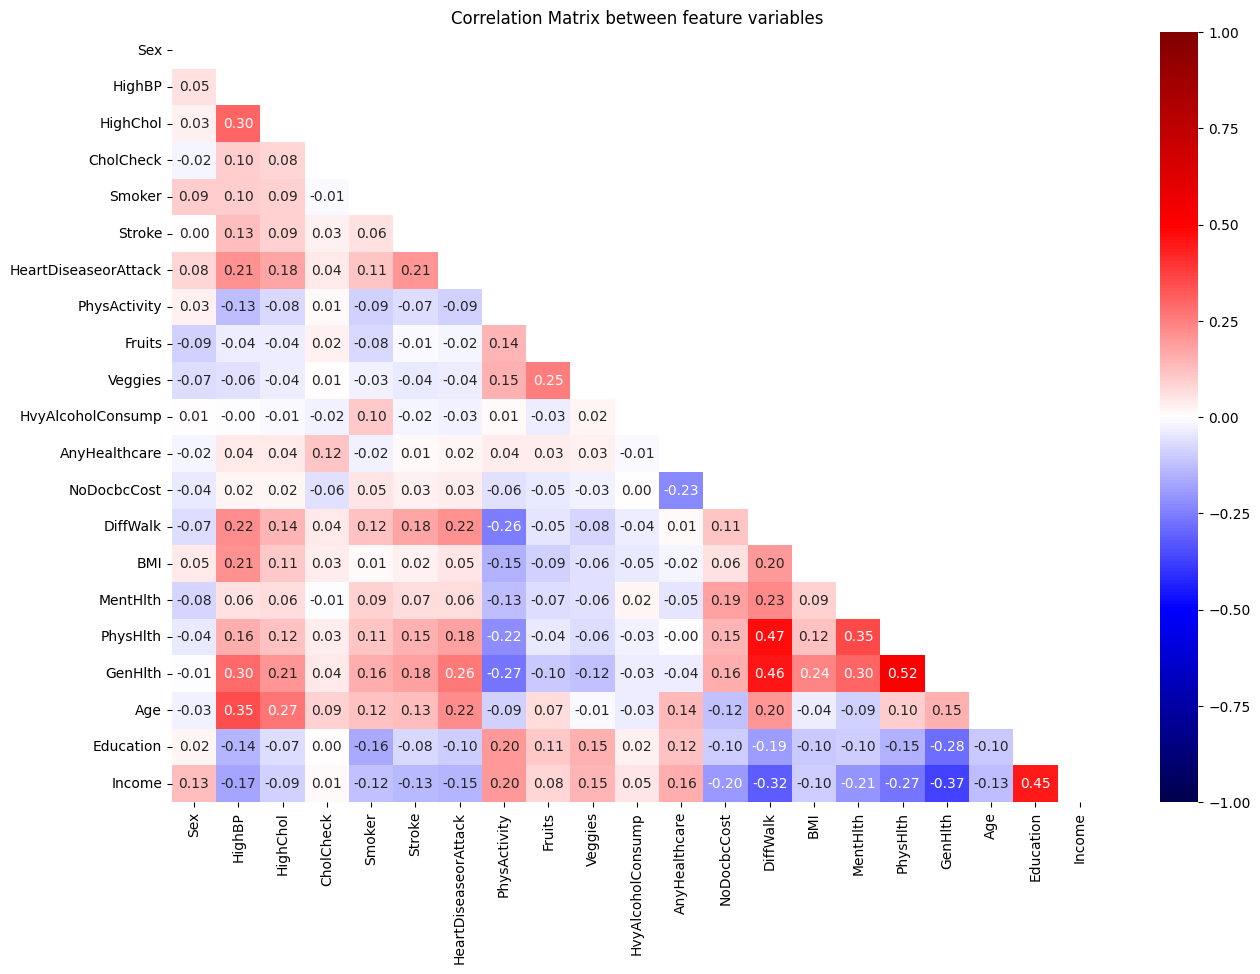

In [34]:
# plot correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap='seismic', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix between feature variables')
plt.show()

Display features with highest pairwise absolute correlation values.

In [35]:
# list all pairs of columns by their abslute correlation value, add the absolute correlation value
corr_matrix_abs = corr_matrix.abs()

corr_matrix_abs = corr_matrix_abs.unstack()
corr_matrix_abs = corr_matrix_abs.sort_values(ascending=False)
# corr_matrix_abs = corr_matrix_abs[corr_matrix_abs != 1]
corr_matrix_abs = corr_matrix_abs.reset_index()
corr_matrix_abs.columns = ['feature_1', 'feature_2', 'abs_corr']
corr_matrix_abs.dropna(how='any', axis=0, inplace=True)
corr_matrix_abs.head(20)


,feature_1,feature_2,abs_corr
0,PhysHlth,GenHlth,0.522022
1,DiffWalk,PhysHlth,0.474585
2,DiffWalk,GenHlth,0.455686
3,Education,Income,0.448885
4,GenHlth,Income,0.369734
5,MentHlth,PhysHlth,0.352359
6,HighBP,Age,0.347124
7,DiffWalk,Income,0.319656
8,MentHlth,GenHlth,0.299024
9,HighBP,HighChol,0.297316


---

### Starting training

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance

from mlxtend.plotting import plot_confusion_matrix

Defining some functions for plotting and printing metrics

In [37]:
def print_metrics(y_val, y_pred):
    # overall accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print("Accuracy:", accuracy)
    # calculate accuracy for each of the both classes separately
    accuracy_class_0 = accuracy_score(y_val[y_val==0], y_pred[y_val==0])
    accuracy_class_1 = accuracy_score(y_val[y_val==1], y_pred[y_val==1])
    print("Accuracy class 0:", accuracy_class_0)
    print("Accuracy class 1:", accuracy_class_1)
    print("Classification report:\n", classification_report(y_val, y_pred))


def calc_plot_confusion_matrix(y_val, y_pred, ax=None, colorbar=False):
    cm = confusion_matrix(y_val, y_pred)
    plot_confusion_matrix(cm, show_absolute=True, show_normed=True, colorbar=colorbar, axis=ax)
    ax.set_title('Confusion Matrix')

def calc_plot_roc_and_precision_recall_curve(y_val, y_pred_proba, ax1, ax2):
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax1)
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_title('ROC Curve')
    ax1.legend(loc="lower right")

    precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)
    average_precision = average_precision_score(y_val, y_pred_proba)
    PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision).plot(ax=ax2)
    ax2.set_title('Precision Recall Curve')
    ax2.legend(loc="lower left")

def calc_plot_cm_roc_precision_recall_curve(y_val, y_pred, y_pred_proba, figsize=(10,4)):
    # create subplots 
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes = axes.ravel()
    calc_plot_confusion_matrix(y_val, y_pred, axes[0])
    calc_plot_roc_and_precision_recall_curve(y_val, y_pred_proba, ax1=axes[1], ax2=axes[2])
    plt.tight_layout()
    

def calc_plot_feature_importance(model, X_train, y_train):
    # plot the feature importance
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=seed)
    sorted_idx = result.importances_mean.argsort()
    fig, ax = plt.subplots(figsize=(12,5))
    ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    fig.tight_layout()
    plt.show()



### Data Preparation

In [38]:
import copy

def preprocess_features(df):
    df_preprocessed = df.copy(deep=True)

    # standard scaling (additional log for BMI)
    df_preprocessed.BMI = np.log(df_preprocessed.BMI)
    df_preprocessed.BMI = (df_preprocessed.BMI - df_preprocessed.BMI.mean()) / df_preprocessed.BMI.std()
    df_preprocessed.Age = (df_preprocessed.Age - df_preprocessed.Age.mean()) / df_preprocessed.Age.std()

    # Min max scaling
    df_preprocessed.MentHlth = (df_preprocessed.MentHlth - 1)/30
    df_preprocessed.PhysHlth = (df_preprocessed.PhysHlth - 1)/30
    df_preprocessed.GenHlth = (df_preprocessed.GenHlth - 1)/5
    df_preprocessed.Education = (df_preprocessed.Education - 1)/6
    df_preprocessed.Income = (df_preprocessed.Income - 1) / 8

    #all other variables are binary, they do not need to be normalized

    return df_preprocessed

In [39]:
# define the target column
target_column = 'Diabetes_binary'
# define the feature columns
feature_columns = [col for col in df.columns if col != target_column]

# split the data into train and val data
X_train = preprocess_features(df_train[feature_columns])
X_val = preprocess_features(df_val[feature_columns])

y_train = df_train[target_column]
y_val = df_val[target_column]

class_weight = len(y_train) / np.bincount(y_train)
class_weight = {0: class_weight[0], 1: class_weight[1]}

For the first model we will not apply the class weights, just to check the influence.

Accuracy: 0.8644030214785141
Accuracy class 0: 0.9782511595945714
Accuracy class 1: 0.16230532895433838
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     58210
           1       0.55      0.16      0.25      9439

    accuracy                           0.86     67649
   macro avg       0.71      0.57      0.59     67649
weighted avg       0.83      0.86      0.83     67649



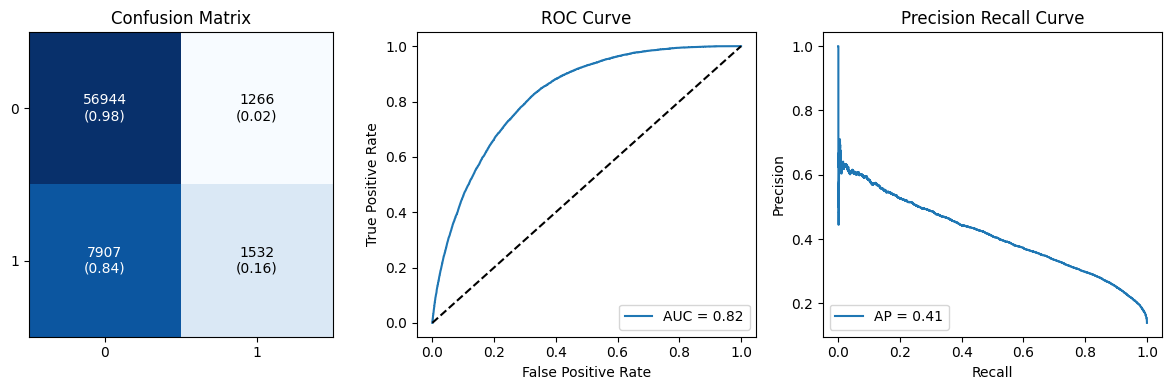

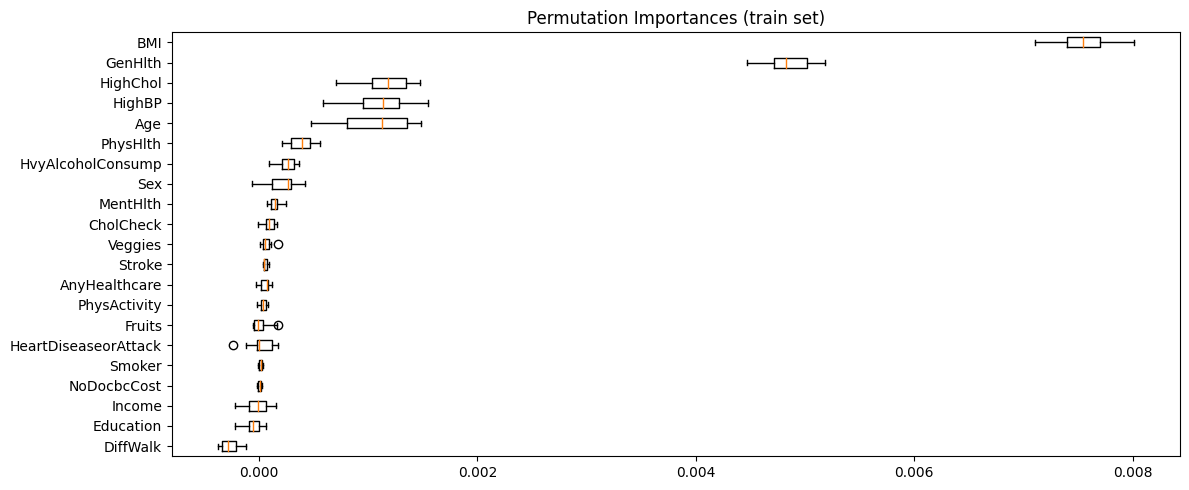

In [40]:
# create the model
model = LogisticRegression(random_state=seed, max_iter=1000)
# train the model
model.fit(X_train, y_train)
# predict the target values
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:,1]

print_metrics(y_val, y_pred)
calc_plot_cm_roc_precision_recall_curve(y_val, y_pred, y_pred_proba, figsize=(12,4))
calc_plot_feature_importance(model, X_train, y_train)

⚠️ From the confusion matrix we can see, that our model is performing bad for patients being diagnosed with (pre-)diabetes. This is  because we have not taken into account the imbalance of the data yet.

---

Taking into account class imbalance.

Accuracy: 0.730284261408151
Accuracy class 0: 0.7244975090190688
Accuracy class 1: 0.7659709715012184
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     58210
           1       0.31      0.77      0.44      9439

    accuracy                           0.73     67649
   macro avg       0.63      0.75      0.63     67649
weighted avg       0.86      0.73      0.77     67649



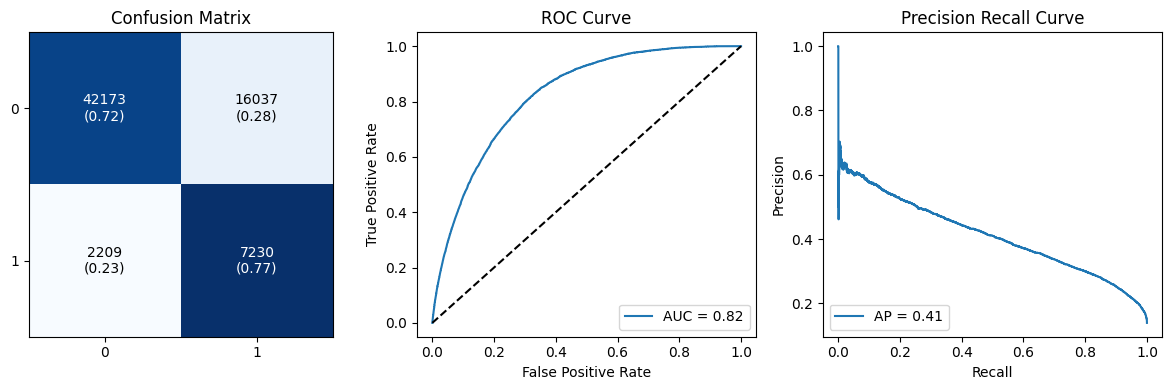

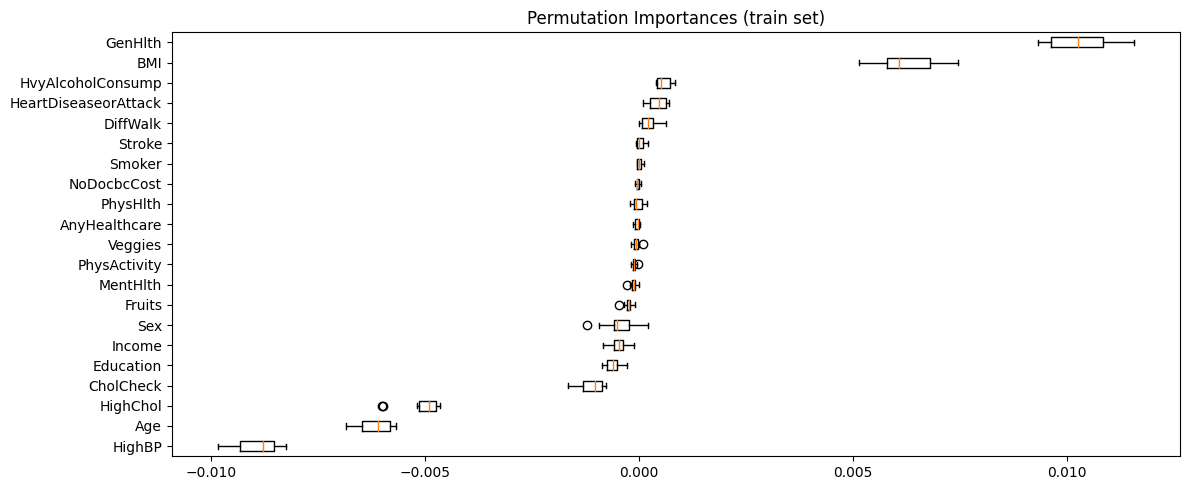

In [41]:
# create the model
model = LogisticRegression(random_state=seed, max_iter=1000, class_weight='balanced')
# train the model
model.fit(X_train, y_train)
# predict the target values
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:,1]

print_metrics(y_val, y_pred)
calc_plot_cm_roc_precision_recall_curve(y_val, y_pred, y_pred_proba, figsize=(12,4))
calc_plot_feature_importance(model, X_train, y_train)

We can see, taking into account class imbalance improves the performance a lot. The recall is now on a same level for 'non-diabetic' and '(pre-)diabetic' patients.

Precision
- '(pre-)diabetic' - here we get a low value, which indicates that we have a lot of false positive cases
- 'non-diabetic'- here we get a high value, which indicates that we only get a little amount of false positive

Recall
- This needs improvement for both groups


It would be ok to have more false positives for '(pre-)diabetic' patients, as we do not want to miss patients being diagnosed with (pre-)diabetes. But the recall needs to be improved for both groups.

----

Searching for suitable Logistic Regression hyperparameters

In [42]:
def train_logistic_regression_model(X_train, y_train, X_test, y_test, hparams, seed):
    if hparams['penalty'] is None:
        model = LogisticRegression(
            random_state=seed, 
            max_iter=1000, 
            class_weight='balanced', 
            solver=hparams['solver'], 
            penalty=hparams['penalty'], 
        )
    else:
        model = LogisticRegression(
            random_state=seed, 
            max_iter=1000, 
            class_weight='balanced', 
            solver=hparams['solver'], 
            penalty=hparams['penalty'], 
            C=hparams['C'],
        )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:,1]
    return y_pred, y_pred_proba


In [43]:
list_hyper_params = [
     {
        'solver': 'liblinear',
        'penalty': ['l1', 'l2'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]
    },
    {
        'solver': 'lbfgs',
        'penalty': ['l2', None],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]
    },
    {
        'solver': 'sag',
        'penalty': ['l2', None],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]
    },
    {
        'solver': 'saga',
        'penalty':  ['l1', 'l2', None],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]
    }
]

In [44]:
from tqdm import tqdm

def metrics_to_dict(y_val, y_pred, model_type):
    precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_pred)
    data = {}
    data['model_type']= model_type
    data['penalty'] = penalty
    data['solver'] = solver
    data['C'] = None
    data['precision_0'] = precision[0]
    data['precision_1'] = precision[1]
    data['recall_0'] = recall[0]
    data['recall_1'] = recall[1]
    data['fscore_0'] = fscore[0]
    data['fscore_1'] = fscore[1]
    data['support_0'] = support[0]
    data['support_1'] = support[1]
    return data

results = []
model_type = 'logistic_regression'
for params in tqdm(list_hyper_params, desc='params in list'):
    solver = params['solver']
    for penalty in params['penalty']:
        hparams = {}
        hparams['penalty'] = penalty
        hparams['solver'] = solver
        if penalty is None:
            hparams['C'] = None
            y_pred, y_pred_proba = train_logistic_regression_model(X_train, y_train, X_val, y_val, hparams, seed)
            precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_pred)
            data = metrics_to_dict(y_val, y_pred, model_type)
            results.append(data)
        else:
            for C in params['C']:
                hparams['C'] = C
                y_pred, y_pred_proba = train_logistic_regression_model(X_train, y_train, X_val, y_val, hparams, seed)
                data = metrics_to_dict(y_val, y_pred, model_type)
                results.append(data)
            
df_results = pd.DataFrame(results)

params in list: 100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:46<00:00, 11.50s/it]


In [45]:
df_results.sort_values(by=['recall_1', 'recall_0'], ascending=False, inplace=True)
df_results

,model_type,penalty,solver,C,precision_0,precision_1,recall_0,recall_1,fscore_0,fscore_1,support_0,support_1
0,logistic_regression,l1,liblinear,None,0.946676,0.221476,0.536162,0.813751,0.684595,0.348187,58210,9439
1,logistic_regression,l1,liblinear,None,0.952027,0.299923,0.704346,0.781121,0.809669,0.433425,58210,9439
6,logistic_regression,l2,liblinear,None,0.950009,0.291496,0.694726,0.774552,0.802556,0.423581,58210,9439
7,logistic_regression,l2,liblinear,None,0.950478,0.304822,0.715169,0.770209,0.816202,0.436781,58210,9439
8,logistic_regression,l2,liblinear,None,0.950915,0.310792,0.723192,0.769785,0.821565,0.442806,58210,9439
2,logistic_regression,l1,liblinear,None,0.950658,0.310898,0.723862,0.768302,0.821901,0.442667,58210,9439
21,logistic_regression,l2,sag,None,0.950525,0.311353,0.724790,0.767348,0.822449,0.442970,58210,9439
14,logistic_regression,l2,lbfgs,None,0.950524,0.311339,0.724772,0.767348,0.822438,0.442956,58210,9439
34,logistic_regression,l2,saga,None,0.950524,0.311339,0.724772,0.767348,0.822438,0.442956,58210,9439
9,logistic_regression,l2,liblinear,None,0.950471,0.311160,0.724618,0.767136,0.822318,0.442739,58210,9439


Regarding the LogisticRegression classifier, we want to select a model that has a high recall value. Especially for the '(pre-)diabetic' patients in the dataset.

There fore we will chose model:

In [46]:
df_results.iloc[1]

model_type     logistic_regression
penalty                         l1
solver                   liblinear
C                             None
precision_0               0.952027
precision_1               0.299923
recall_0                  0.704346
recall_1                  0.781121
fscore_0                  0.809669
fscore_1                  0.433425
support_0                    58210
support_1                     9439
Name: 1, dtype: object

### Decision Trees
We will now check, if we can improve using decision trees.

In [153]:
from sklearn.ensemble import RandomForestClassifier
from itertools import product

import seaborn as sns
import matplotlib.pyplot as plt




In [146]:


def train_random_forest_model(X_train, y_train, X_test, y_test, hparams, seed):
    model = RandomForestClassifier(random_state=seed, **hparams, class_weight='balanced', n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:,1]
    return y_pred, y_pred_proba


def metrics_to_dict_tree(y_val, y_pred, model_type, hparams):
    precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_pred)
    # deepcopy of dict
    data = copy.deepcopy(hparams)
    data['model_type'] = model_type
    data['precision_0'] = precision[0]
    data['precision_1'] = precision[1]
    data['recall_0'] = recall[0]
    data['recall_1'] = recall[1]
    data['fscore_0'] = fscore[0]
    data['fscore_1'] = fscore[1]
    data['support_0'] = support[0]
    data['support_1'] = support[1]
    return data

params_rf = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [10, 50, 100, 150, 200],
    #'criterion': ['gini'],#, 'entropy', 'log_loss'],
    #'min_samples_split': [2, 3],
    #'min_samples_leaf': [1, 2, 3],
    #'min_impurity_decrease': [0.0, 0.1], #0.2, 0.3],
    #'bootstrap': [True, False],
}


In [147]:
test_params =  {
    'max_depth': 1,
    'n_estimators': 100,
    'criterion': 'gini',
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'min_impurity_decrease': 0.,
    'bootstrap': False,
}
train_random_forest_model(X_train, y_train, X_val, y_val, test_params, seed=seed)
metrics_to_dict(y_val, y_pred, 'random_forest')

{'model_type': 'random_forest',
 'penalty': None,
 'solver': 'saga',
 'C': None,
 'precision_0': 0.951468244935124,
 'precision_1': 0.30806526413423835,
 'recall_0': 0.7180553169558496,
 'recall_1': 0.7741286153194195,
 'fscore_0': 0.8184452711963971,
 'fscore_1': 0.44073828337052895,
 'support_0': 58210,
 'support_1': 9439}

In [148]:
results_trees = []
combinations = list(product(*params_rf.values()))
for param in tqdm(combinations, desc='list trees'):
    hparams = dict(zip(params_rf.keys(), param))
    y_pred, y_pred_proba = train_random_forest_model(X_train, y_train, X_val, y_val, hparams, seed)
    data = metrics_to_dict_tree(y_val, y_pred, 'random_forest', hparams)
    results_trees.append(data)
            
df_results_trees = pd.DataFrame(results_trees)

list trees: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:40<00:00,  1.11it/s]


In [133]:
df_results_trees.sort_values(by=['recall_1', 'recall_0'], ascending=False, inplace=True)
df_results_trees.head(10)

,max_depth,n_estimators,criterion,min_samples_leaf,model_type,precision_0,precision_1,recall_0,recall_1,fscore_0,fscore_1,support_0,support_1
16,6,100,gini,2,random_forest,0.952160,0.300959,0.705721,0.781333,0.810624,0.434539,58210,9439
15,6,100,gini,1,random_forest,0.952065,0.300771,0.705618,0.780909,0.810522,0.434278,58210,9439
17,6,100,gini,3,random_forest,0.952037,0.300886,0.705858,0.780697,0.810670,0.434365,58210,9439
20,7,100,gini,3,random_forest,0.952162,0.303813,0.710187,0.779956,0.813563,0.437290,58210,9439
18,7,100,gini,1,random_forest,0.951871,0.302934,0.709414,0.778790,0.812950,0.436196,58210,9439
19,7,100,gini,2,random_forest,0.951929,0.303819,0.710668,0.778684,0.813794,0.437097,58210,9439
22,8,100,gini,2,random_forest,0.952109,0.307915,0.716544,0.777731,0.817699,0.441166,58210,9439
21,8,100,gini,1,random_forest,0.951759,0.307870,0.717179,0.775824,0.817983,0.440813,58210,9439
9,4,100,gini,1,random_forest,0.950526,0.294947,0.699399,0.775506,0.805851,0.427358,58210,9439
10,4,100,gini,2,random_forest,0.950526,0.294947,0.699399,0.775506,0.805851,0.427358,58210,9439


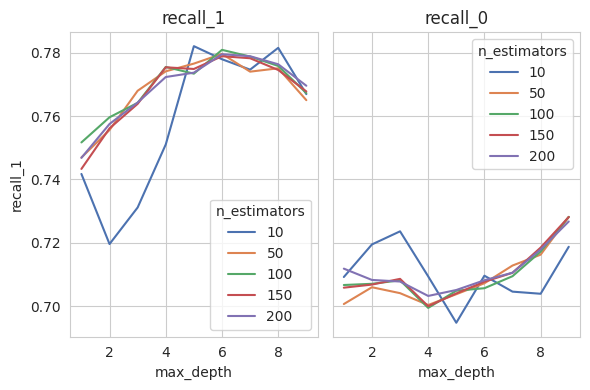

In [173]:

def plot_results_trees(df_results_trees, x, y_name, hue):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 4), sharey=True)
    sns.lineplot(
        data=df_results_trees, 
        x=x, y=f'{y_name}_1', hue=hue,
        palette='deep', ax=ax1)
    ax1.set_title(f'{y_name}_1')

    sns.lineplot(
        data=df_results_trees, 
        x=x, y=f'{y_name}_0', hue=hue,
        palette='deep', ax=ax2)
    ax2.set_title(f'{y_name}_0')

    plt.tight_layout()
    plt.show()


x = 'max_depth'
y_name = 'recall'
hue = 'n_estimators'
plot_results_trees(df_results_trees, x, y_name, hue)

In [178]:
params_rf = {
    'max_depth': [ 6,  ],
    'n_estimators': list(range(10, 301, 10)),
    #'criterion': ['gini'],#, 'entropy', 'log_loss'],
    #'min_samples_split': [2, 3],
    #'min_samples_leaf': [1, 2, 3],
    #'min_impurity_decrease': [0.0, 0.1], #0.2, 0.3],
    #'bootstrap': [True, False],
}

results_trees = []
combinations = list(product(*params_rf.values()))
for param in tqdm(combinations, desc='list trees'):
    hparams = dict(zip(params_rf.keys(), param))
    y_pred, y_pred_proba = train_random_forest_model(X_train, y_train, X_val, y_val, hparams, seed)
    data = metrics_to_dict_tree(y_val, y_pred, 'random_forest', hparams)
    results_trees.append(data)
            
df_results_trees = pd.DataFrame(results_trees)

list trees: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:44<00:00,  1.48s/it]


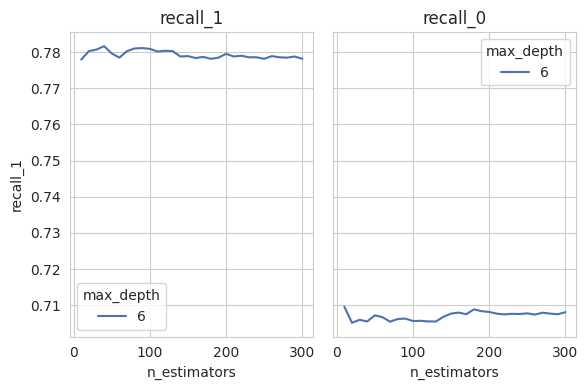

In [180]:
x = 'n_estimators'
y_name = 'recall'
hue = 'max_depth'
plot_results_trees(df_results_trees, x, y_name, hue)

In [181]:
params_rf = {
    'max_depth': [ 6 ],
    'n_estimators': [100],
    #'criterion': ['gini'],#, 'entropy', 'log_loss'],
    #'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    #'min_impurity_decrease': [0.0, 0.1], #0.2, 0.3],
    #'bootstrap': [True, False],
}

results_trees = []
combinations = list(product(*params_rf.values()))
for param in tqdm(combinations, desc='list trees'):
    hparams = dict(zip(params_rf.keys(), param))
    y_pred, y_pred_proba = train_random_forest_model(X_train, y_train, X_val, y_val, hparams, seed)
    data = metrics_to_dict_tree(y_val, y_pred, 'random_forest', hparams)
    results_trees.append(data)
            
df_results_trees = pd.DataFrame(results_trees)

list trees: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.04s/it]


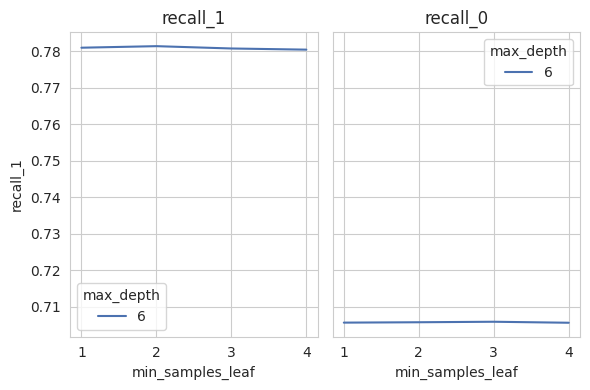

In [182]:
x = 'min_samples_leaf'
y_name = 'recall'
hue = 'max_depth'
plot_results_trees(df_results_trees, x, y_name, hue)

In [183]:
params_rf = {
    'max_depth': [ 6 ],
    'n_estimators': [100],
    #'criterion': ['gini'],#, 'entropy', 'log_loss'],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    #'min_impurity_decrease': [0.0, 0.1], #0.2, 0.3],
    #'bootstrap': [True, False],
}

results_trees = []
combinations = list(product(*params_rf.values()))
for param in tqdm(combinations, desc='list trees'):
    hparams = dict(zip(params_rf.keys(), param))
    y_pred, y_pred_proba = train_random_forest_model(X_train, y_train, X_val, y_val, hparams, seed)
    data = metrics_to_dict_tree(y_val, y_pred, 'random_forest', hparams)
    results_trees.append(data)
            
df_results_trees = pd.DataFrame(results_trees)

list trees: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.05it/s]


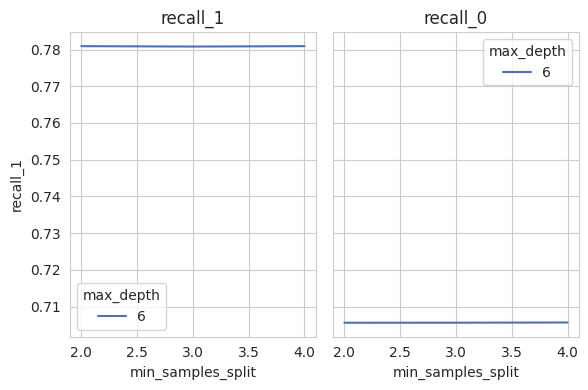

In [184]:
x = 'min_samples_split'
y_name = 'recall'
hue = 'max_depth'
plot_results_trees(df_results_trees, x, y_name, hue)

In [192]:
params_rf = {
    'max_depth': [ 6 ],
    'n_estimators': [100],
    #'criterion': ['gini'],#, 'entropy', 'log_loss'],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],
    #'bootstrap': [True, False],
}

results_trees = []
combinations = list(product(*params_rf.values()))
for param in tqdm(combinations, desc='list trees'):
    hparams = dict(zip(params_rf.keys(), param))
    y_pred, y_pred_proba = train_random_forest_model(X_train, y_train, X_val, y_val, hparams, seed)
    data = metrics_to_dict_tree(y_val, y_pred, 'random_forest', hparams)
    results_trees.append(data)
            
df_results_trees = pd.DataFrame(results_trees)

list trees:  25%|████████████████████████▎                                                                        | 1/4 [00:01<00:03,  1.02s/it]/home/sy23/miniconda3/envs/mlzoomcamp-midterm/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
list trees:  50%|████████████████████████████████████████████████▌                                                | 2/4 [00:01<00:01,  1.33it/s]/home/sy23/miniconda3/envs/mlzoomcamp-midterm/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
list trees:  75%|█

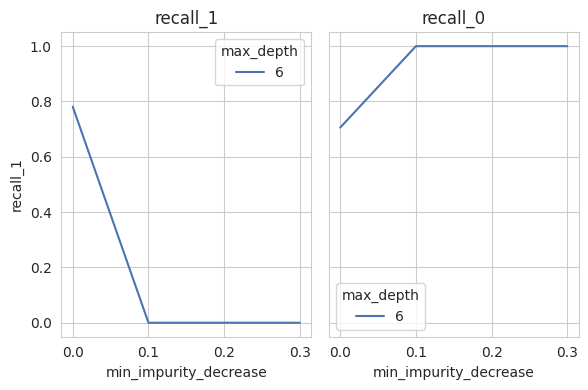

In [186]:
x = 'min_impurity_decrease'
y_name = 'recall'
hue = 'max_depth'
plot_results_trees(df_results_trees, x, y_name, hue)

In [194]:
params_rf = {
    'max_depth': [ 6 ],
    'n_estimators': [100],
    #'criterion': ['gini'],#, 'entropy', 'log_loss'],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'min_impurity_decrease': [0.0],
    'bootstrap': [True, False],
}

results_trees = []
combinations = list(product(*params_rf.values()))
for param in tqdm(combinations, desc='list trees'):
    hparams = dict(zip(params_rf.keys(), param))
    y_pred, y_pred_proba = train_random_forest_model(X_train, y_train, X_val, y_val, hparams, seed)
    data = metrics_to_dict_tree(y_val, y_pred, 'random_forest', hparams)
    results_trees.append(data)
            
df_results_trees = pd.DataFrame(results_trees)

list trees: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.01it/s]


In [196]:
df_results_trees.sort_values(by=['recall_1', 'recall_0'], ascending=False, inplace=True)
df_results_trees

,max_depth,n_estimators,min_samples_split,min_samples_leaf,min_impurity_decrease,bootstrap,model_type,precision_0,precision_1,recall_0,recall_1,fscore_0,fscore_1,support_0,support_1
1,6,100,2,1,0.0,False,random_forest,0.952464,0.301950,0.706666,0.782498,0.811357,0.435752,58210,9439
0,6,100,2,1,0.0,True,random_forest,0.952065,0.300771,0.705618,0.780909,0.810522,0.434278,58210,9439


The settings below would be your final settings, but as there are not a lot better than LogisticRegression, we will try out XGBoost as well.

In [ ]:
params_rf = {
    'max_depth': [ 6 ],
    'n_estimators': [100],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'min_impurity_decrease': [0.0],
    'bootstrap': [False],
}


---
### XGBoost


In [242]:
import xgboost as xgb

scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
watchlist = [(dtrain, 'train'), (dval, 'val')]

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)


In [255]:
eta_values = [0.4, 0.3, 0.2, 0.1, 0.05]
params = {
    'eta': eta_values[0], 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 0,

    'scale_pos_weight': scale_pos_weight,
}



results_xgb = {}


for eta in eta_values:
    evals_result = {}
    params['eta'] = eta
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=100,
        evals=[(dtrain, 'train'), (dval, 'val')],
        evals_result=evals_result,
        verbose_eval=0,
    )
    results_xgb[params['eta']] = evals_result

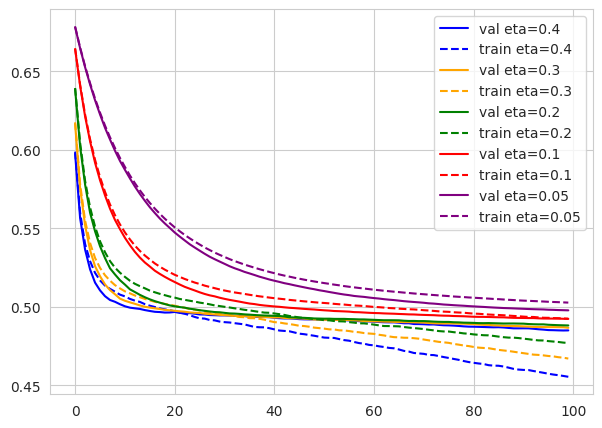

In [256]:
# print the scores as curve for each eta
plt.figure(figsize=(7, 5))
ax = plt.gca()

colors = ['blue', 'orange', 'green','red', 'purple', 'brown', 'gray']

for i, eta in enumerate(results_xgb):
    sns.lineplot(data=results_xgb[eta]['val']['logloss'], ax=ax, label=f'val eta={eta}', color=colors[i])
    sns.lineplot(data=results_xgb[eta]['train']['logloss'], ax=ax, label=f'train eta={eta}', color=colors[i], linestyle='--')

plt.show()

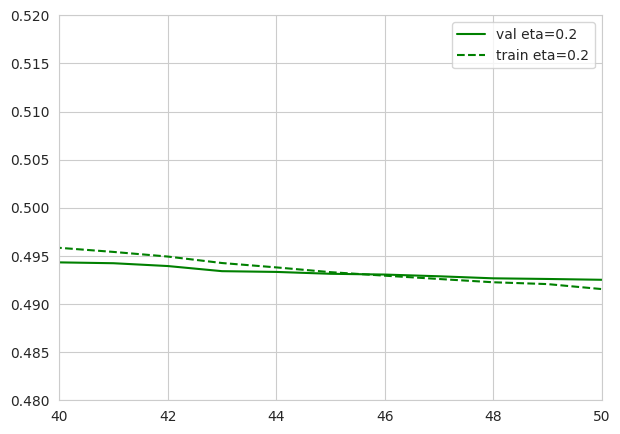

In [266]:
# print the scores as curve for each eta
plt.figure(figsize=(7, 5))
ax = plt.gca()
eta = 0.2
sns.lineplot(data=results_xgb[eta]['val']['logloss'], ax=ax, label=f'val eta={eta}', color='green')
sns.lineplot(data=results_xgb[eta]['train']['logloss'], ax=ax, label=f'train eta={eta}', color='green', linestyle='--')

plt.xlim(40, 50)
plt.ylim(0.48, 0.52)
plt.show()

intersetciton at iteration 45 (46, if starting from zero)

In [267]:
params = {
    'eta': 0.2, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 0,

    'scale_pos_weight': scale_pos_weight,
}

evals_result = {}
model = xgb.train(
    params,
    dtrain,
    num_boost_round=46,
    evals=[(dtrain, 'train'), (dval, 'val')],
    evals_result=evals_result,
    verbose_eval=5,
)
    
y_pred = model.predict(dval)

[0]	train-logloss:0.63947	val-logloss:0.63872
[5]	train-logloss:0.54180	val-logloss:0.53867
[10]	train-logloss:0.51914	val-logloss:0.51424
[15]	train-logloss:0.51040	val-logloss:0.50484
[20]	train-logloss:0.50596	val-logloss:0.50040
[25]	train-logloss:0.50276	val-logloss:0.49793
[30]	train-logloss:0.50009	val-logloss:0.49623
[35]	train-logloss:0.49780	val-logloss:0.49510
[40]	train-logloss:0.49584	val-logloss:0.49433
[45]	train-logloss:0.49331	val-logloss:0.49314


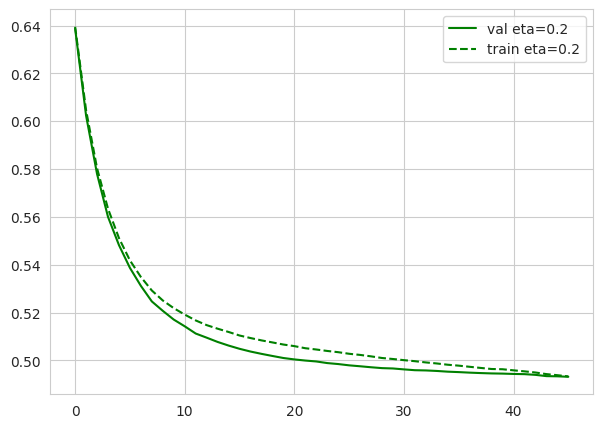

In [268]:
# print the scores as curve for each eta
plt.figure(figsize=(7, 5))
ax = plt.gca()
eta = 0.2
sns.lineplot(data=evals_result['val']['logloss'], ax=ax, label=f'val eta={eta}', color='green')
sns.lineplot(data=evals_result['train']['logloss'], ax=ax, label=f'train eta={eta}', color='green', linestyle='--')

plt.show()

In [269]:
print(classification_report(y_val, y_pred >= 0.5))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82     58210
           1       0.31      0.77      0.45      9439

    accuracy                           0.73     67649
   macro avg       0.63      0.75      0.63     67649
weighted avg       0.86      0.73      0.77     67649

